In [269]:
import pandas as pd
import numpy as np

In [270]:
#Connect to database

import mysql.connector
import time
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password",
  database="valorant_tracker"
)
cursor = mydb.cursor() 

In [271]:
df = pd.read_sql("SELECT * FROM stats", mydb)
print("Number of samples: " + str(df.shape[0]))

Number of samples: 2380703


In [272]:
df['user_id'] = df['match_player_id'].str[36:]


In [273]:
print(df.columns)

Index(['match_player_id', 'rounds', 'date', 'result', 'map', 'smurf', 'agent',
       'kills', 'headshots', 'deaths', 'assists', 'damage', 'damage_received',
       'econ_rating', 'plants', 'defuses', 'first_bloods', 'grenade_casts',
       'ability_2_casts', 'ability_1_casts', 'ultimate_casts', 'placement',
       'kdratio', 'headshot_percentage', 'first_deaths', 'last_deaths',
       'current_rank', 'user_id'],
      dtype='object')


In [274]:
data = df.drop(["match_player_id", 
"user_id", 
"date", 
"rounds", 
"map", 
"result", 
"agent",
"smurf",
"current_rank",], axis=1)

#Should eventually take into account ability casts for each agent
data = data.drop(["grenade_casts",
"ability_2_casts",
"ability_1_casts",
"ultimate_casts"
], axis=1)


Working with the raw data is difficult since it is not very gaussian. Will instead average all stats and work with a dataset of users.

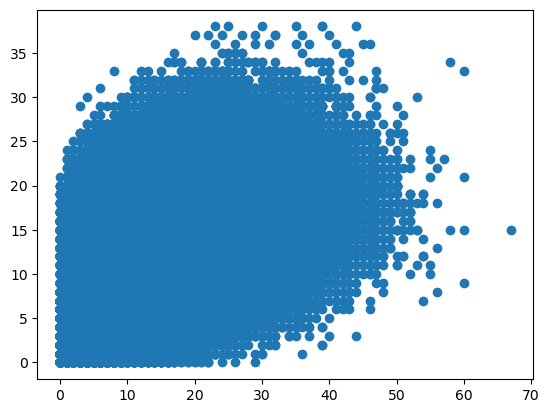

In [275]:
import matplotlib.pyplot as plt

plt.scatter(df["kills"], df["deaths"])

No validation set or test set being used to find optimal epsilon (should consider doing that, however, 0.000001 seems to work fairly well). After checking the accounts below, some of them appear to have two different users. One plays extremely well and the other plays poorly.

In [276]:
sub_data = df[["kills", "deaths", "user_id"]]
avg_data = sub_data.groupby("user_id").mean()


In [277]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.006))
clf = isof.fit(avg_data)

In [278]:
anomaly = clf.predict(avg_data)

In [279]:
test_anomaly = avg_data
test_anomaly["anomaly"] = anomaly.tolist()


In [280]:
anomalies = test_anomaly[(test_anomaly["anomaly"] == -1)]

In [281]:
anomalies.shape[0]

52

In [282]:
anom_true = anomalies[(anomalies["anomaly"] == -1)]

Text(0.5, 1.0, 'Kills Vs Deaths Outliers')

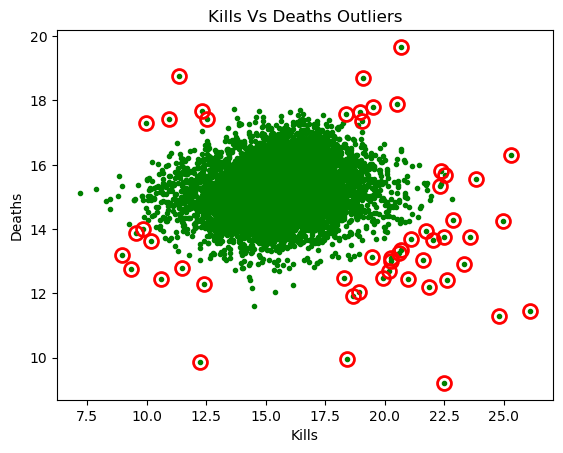

In [283]:
plt.plot(avg_data["kills"], avg_data["deaths"], 'g.')

plt.plot(anom_true["kills"].to_numpy(), anom_true["deaths"].to_numpy(), 'or',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)
plt.xlabel("Kills")
plt.ylabel("Deaths")
plt.title("Kills Vs Deaths Outliers")

In [284]:
anom_true

,kills,deaths,anomaly
user_id,,,
2006 Ford F250#beep,9.333333,12.769231,-1
2321#00000,20.263158,13.105263,-1
AdanNoAim7#6969,18.950000,17.650000,-1
Angelas duo#0000,22.606061,12.424242,-1
BIO GpixL#BIO,18.373333,17.583333,-1
Billy#Bob,18.394231,9.971154,-1
Blade#3091,11.350000,18.750000,-1
Cringe#1578,12.217949,9.858974,-1
Cwammycwam79#nerds,21.850000,12.200000,-1


In [285]:
high_dim_data = df.drop(["match_player_id", 
"date", 
"rounds", 
"map", 
"result", 
"agent",
"smurf",
"current_rank",
"grenade_casts",
"ability_2_casts",
"ability_1_casts",
"ultimate_casts",], axis=1)


In [246]:
avg_high_dim_data = high_dim_data.groupby("user_id").mean()
avg_high_dim_data.head()

,kills,headshots,deaths,assists,damage,damage_received,econ_rating,plants,defuses,first_bloods,placement,kdratio,headshot_percentage,first_deaths,last_deaths
user_id,,,,,,,,,,,,,,,
000#Angel,16.066667,10.460000,14.663333,4.263333,3035.400000,2860.116667,65.773333,0.496667,0.380000,2.316667,5.196667,1.283333,24.110006,1.960000,2.20
01000101#NA1,14.596667,9.233333,15.190000,5.790000,2785.880000,2926.673333,54.876667,2.526667,0.390000,1.400000,6.306667,1.066667,24.125524,1.336667,2.19
0ClF#519,15.400000,10.000000,14.930000,4.816667,2872.456667,2831.420000,55.220000,1.426667,0.450000,1.850000,5.770000,1.170000,25.912547,1.900000,2.43
0Sanchez0#4845,14.620000,8.346667,16.366667,4.546667,2736.280000,3202.150000,49.826667,0.760000,0.336667,2.183333,5.786667,1.016667,17.345266,2.836667,1.49
0hwin#3712,17.663333,11.956667,15.863333,4.426667,3322.870000,3140.603333,61.710000,0.726667,0.343333,2.646667,4.363333,1.226667,26.356144,2.313333,1.72


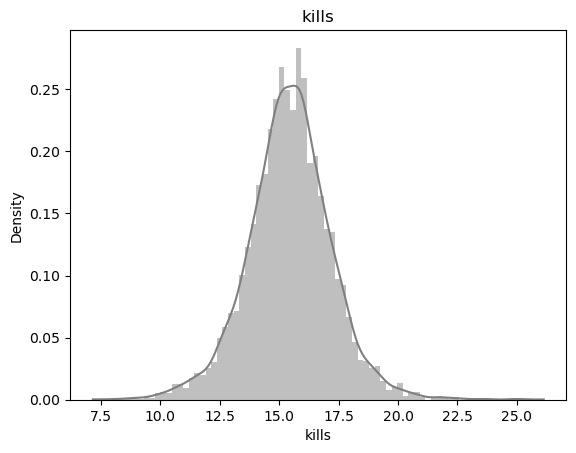

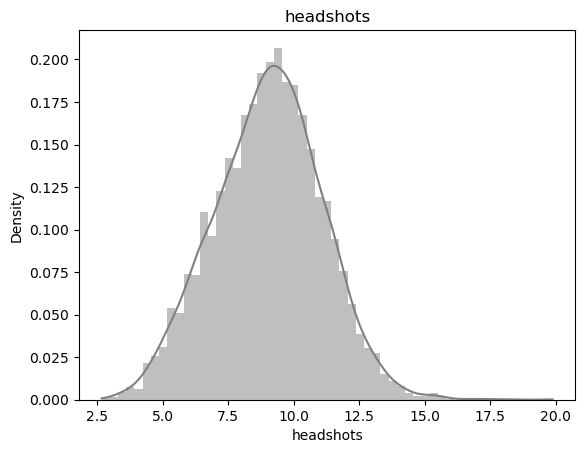

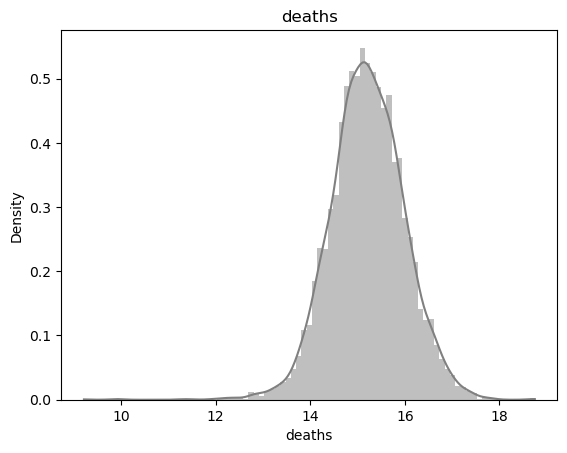

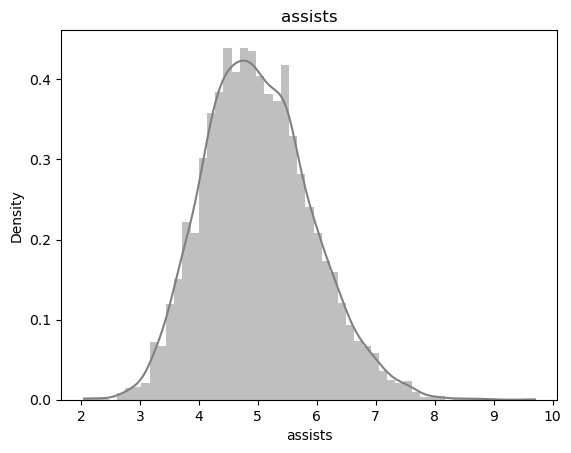

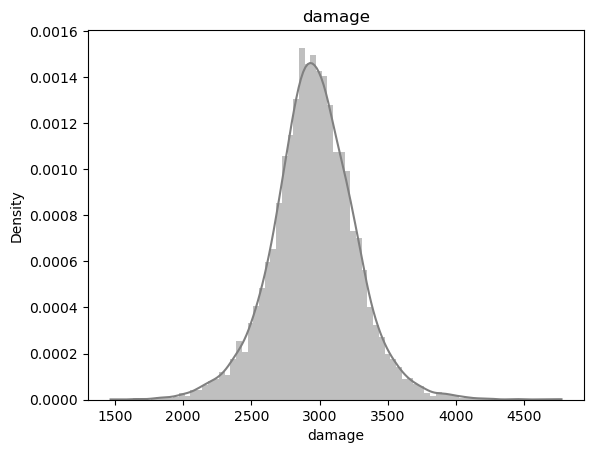

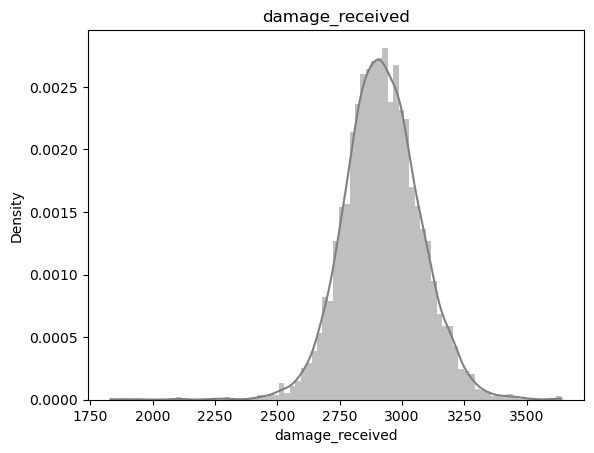

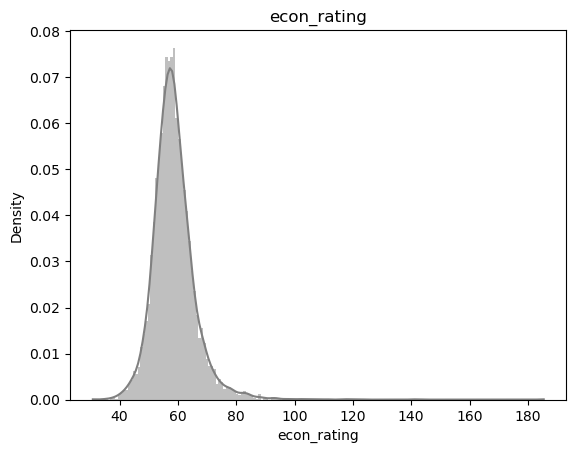

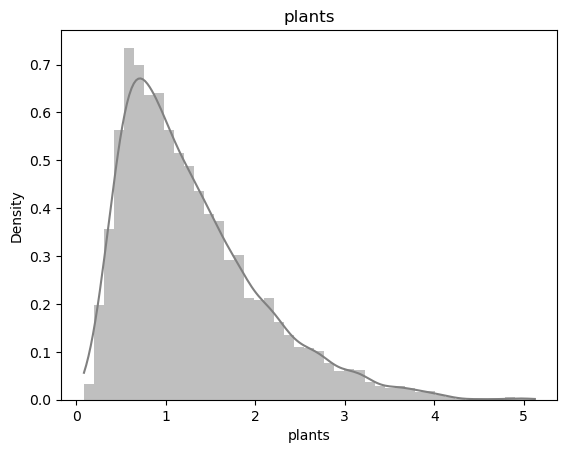

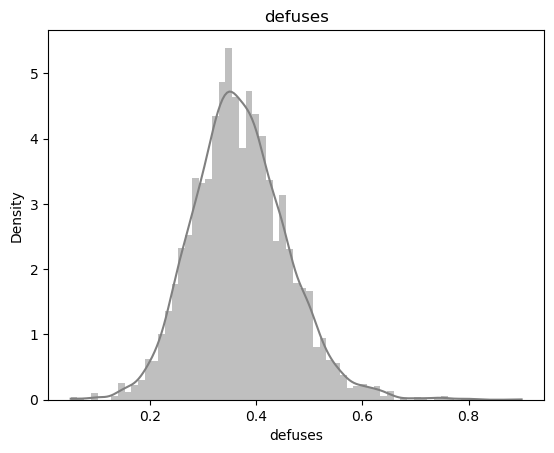

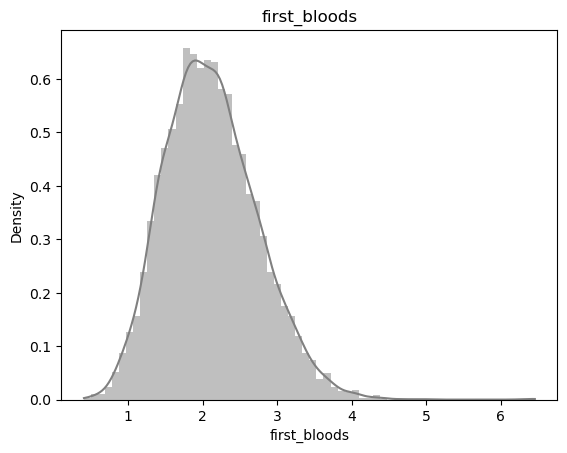

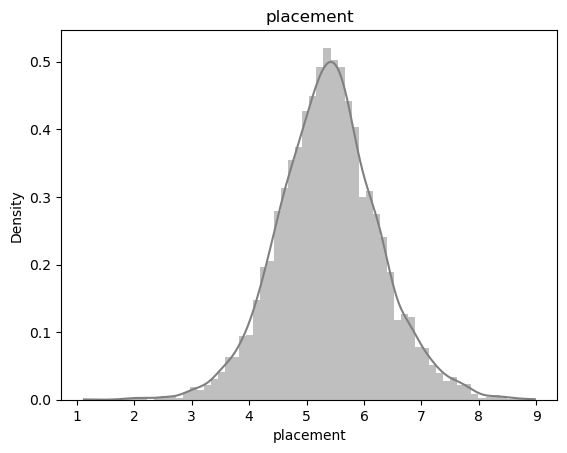

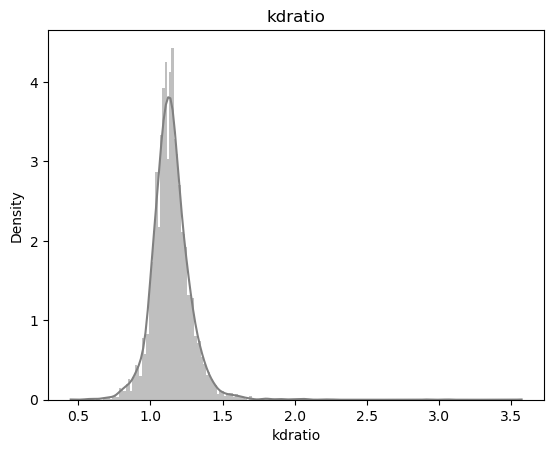

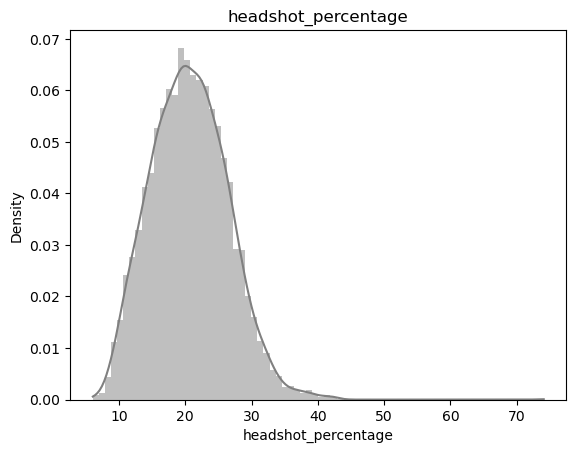

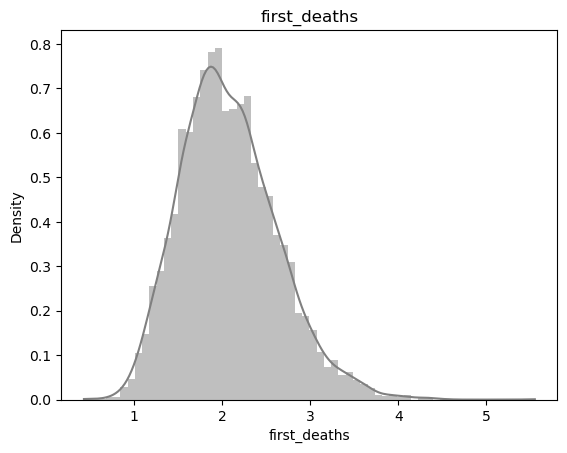

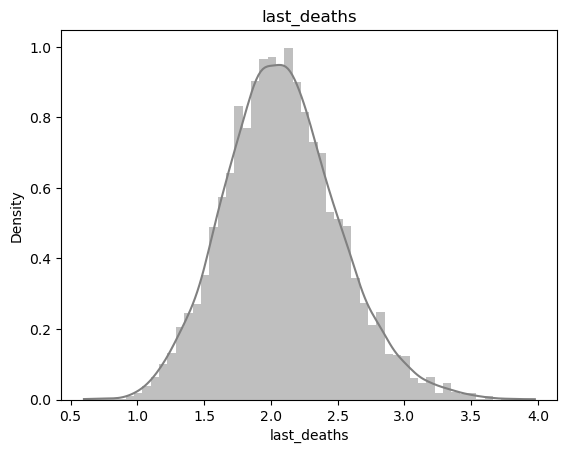

In [247]:
import seaborn as sns
for col in avg_high_dim_data:
    sns.histplot(avg_high_dim_data[col], color="grey", label="100% Equities", kde=True, stat="density", linewidth=0)
    plt.title(col)
    plt.show()

In [258]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.006))
clf = isof.fit(avg_high_dim_data)

In [259]:
anomaly_high_dim = clf.predict(avg_high_dim_data)

In [260]:
test_anomaly_high_dim = avg_high_dim_data
test_anomaly_high_dim["anomaly"] = anomaly_high_dim.tolist()
anomalies_high_dim = test_anomaly_high_dim[(test_anomaly_high_dim["anomaly"] == -1)]
print("Anomalies flagged: " + str(anomalies_high_dim.shape[0]))
anom_true_high_dim = anomalies_high_dim[(anomalies_high_dim["anomaly"] == -1)]
anom_true_high_dim

Anomalies flagged: 33


,kills,headshots,deaths,assists,damage,damage_received,econ_rating,plants,defuses,first_bloods,placement,kdratio,headshot_percentage,first_deaths,last_deaths,anomaly
user_id,,,,,,,,,,,,,,,,
2006 Ford F250#beep,9.333333,3.743590,12.769231,4.179487,1778.897436,2298.179487,47.307692,1.512821,0.256410,1.897436,7.846154,0.692308,11.278079,1.743590,1.230769,-1
Billy#Bob,18.394231,11.682692,9.971154,4.567308,3509.192308,2108.605769,89.423077,1.221154,0.413462,3.028846,2.865385,2.086538,21.929741,1.490385,1.346154,-1
Blade#3091,11.350000,4.500000,18.750000,4.850000,2400.550000,3430.750000,44.300000,0.300000,0.300000,2.550000,7.300000,0.550000,10.087577,5.550000,1.150000,-1
BlasiaN#MAMBA,20.657895,13.763158,14.184211,5.289474,3821.815789,2860.157895,77.578947,3.868421,0.631579,1.368421,3.315789,1.631579,26.711595,0.763158,2.921053,-1
Brooke#0000,9.620000,5.113333,15.370000,6.500000,1987.793333,2906.980000,39.463333,3.920000,0.423333,0.950000,8.340000,0.690000,15.975041,1.550000,2.573333,-1
Cringe#1578,12.217949,6.307692,9.858974,3.294872,2464.205128,1919.782051,116.807692,0.307692,0.128205,1.923077,5.384615,1.538462,14.829750,1.461538,1.166667,-1
Cwammycwam79#nerds,21.850000,13.150000,12.200000,4.600000,4038.300000,2500.950000,93.500000,0.350000,0.350000,2.800000,2.100000,2.200000,20.592476,1.700000,1.450000,-1
EBoy#3690,22.500000,12.571429,9.214286,3.357143,4000.642857,1831.500000,185.428571,2.714286,0.285714,2.857143,2.000000,3.571429,19.555132,0.857143,2.428571,-1
EloBooster#Boost,21.796178,15.235669,15.216561,4.152866,4133.566879,3156.496815,83.292994,0.968153,0.439490,3.764331,3.171975,1.687898,27.320553,2.350318,1.764331,-1
